# GTSRB training set

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/28-1.png" style="max-width: 60%; height: auto;"><p>


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# 1. 파일 다운로드

- #### [training data download: [GTSRB_Final_Training_Images.zip]](http://cmseng.skku.edu/CMSLecture/ML/img/GTSRB_Final_Training_Images.zip)

!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

# 2. 압축을 풀어보면, 데이터 디렉토리 구조는 다음과 같음
<pre>
GTSRB   
 |- Final_Training   
    |- Images   
        |- 00000   
        |- 00001   
        |- 00002   
        |- .....   
        |- 00042   </pre>

# 3. 디렉토리 설정

In [141]:
import os

ROOT_DIR = '.'

DATA_ROOT_DIR = os.path.join(ROOT_DIR,'GTSRB/Final_Training/Images/')
print(ROOT_DIR)
print(DATA_ROOT_DIR)
print(ROOT_DIR+'/GTSRB/')

.
./GTSRB/Final_Training/Images/
./GTSRB/


In [4]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

label_name_list = os.listdir(DATA_ROOT_DIR)

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  43
['00031', '00009', '00036', '00000', '00038', '00007', '00039', '00006', '00001', '00008', '00037', '00030', '00041', '00012', '00015', '00023', '00024', '00040', '00025', '00022', '00014', '00013', '00035', '00032', '00004', '00003', '00002', '00005', '00033', '00034', '00016', '00029', '00011', '00027', '00018', '00020', '00042', '00021', '00026', '00019', '00010', '00017', '00028']


# 4. 이미지 파일 cv2로 읽어들이기 
- ### 원본 image를 정답 디렉토리별로 읽어서 x_train numpy 생성
- ### train label 읽어서 y_train numpy 생성

## opencv-python 설치
<code>pip install opencv-python</code>

In [5]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

image_label_list = os.listdir(DATA_ROOT_DIR)    # 정답이름

for label_name in image_label_list:

    # 이미지 파일 읽어오기

    file_path = os.path.join(DATA_ROOT_DIR, label_name)
    img_file_list = glob.glob(file_path+'/*.ppm')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .ppm 파일 읽어서 리스트에 저장

    for img_file in img_file_list:

        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
            src_img = cv2.resize(src_img, dsize=(32,32))
            src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

            image_list.append(src_img)
            label_list.append(float(label_name))  # 정답은 문자열을 실수로 변환

        except Exception as err:
            print(str(err), img_file)
            continue

In [7]:
# numpy 변환
print(type(image_list))
print(type(label_list))

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

<class 'list'>
<class 'list'>
x_train.shape =  (39209, 32, 32, 3) , y_train.shape =  (39209,)


# 5. Train dataset에서 Test dataset 분리 

- ### test data 생성. train : test = 8 : 2

- #### 단, 데이터 다양성을 위해서 train data 를 먼저 random shuffle 한후에 test data 생성함.
- #### 이때 주의할것은 label data 도 동일한 인덱스로 shuffle 되어야 한다는 것이다

In [8]:
import numpy as np

s = np.arange(len(x_train))  # [ 0 1 2...39206 39207 39208]
print(s, len(x_train))
np.random.shuffle(s)         # index random shuffle

x_train = x_train[s]
y_train = y_train[s]

[    0     1     2 ... 39206 39207 39208] 39209


### x_train : x_test = 8 : 2

In [9]:
SPLIT_RATIO = 0.2    # 20%

SPLIT_NUMS = int(SPLIT_RATIO*len(x_train))

x_test = x_train[0:SPLIT_NUMS]
y_test = y_train[0:SPLIT_NUMS]

x_train = x_train[SPLIT_NUMS:]
y_train = y_train[SPLIT_NUMS:]

### x_train, x_test, y_train, y_test shape 확인

In [10]:
print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

x_train.shape =  (31368, 32, 32, 3) , y_train.shape =  (31368,)
x_test.shape =  (7841, 32, 32, 3) , y_test.shape =  (7841,)


In [13]:
print(y_train[:10])
print(y_test[:10])

[ 1. 11.  1.  6. 38. 34. 15. 13. 29.  5.]
[ 0.  3.  4. 35.  5. 12.  4. 38. 26.  1.]


# 6. 데이터 정규화

In [14]:
# 정규화

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 7. 이미지 출력

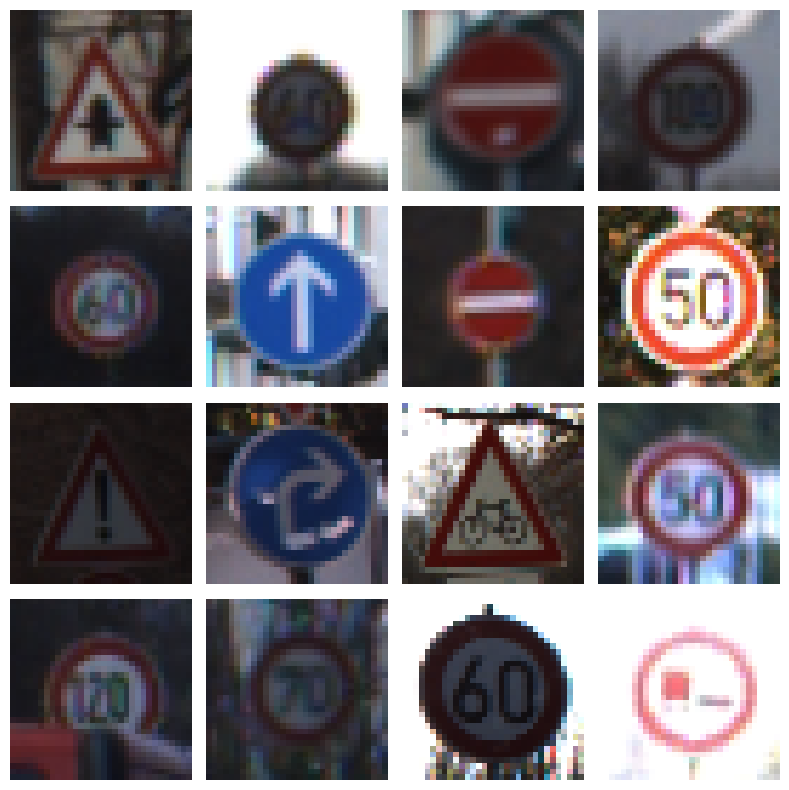

In [15]:
import matplotlib.pyplot as plt

random_index = np.random.randint(0, len(x_train), 16)    # 16개 랜덤 train 데이터 추출

plt.figure(figsize=(8,8))

for pos in range(len(random_index)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')
    train_img_index = random_index[pos]
    plt.imshow(x_train[train_img_index])

plt.tight_layout()
plt.show()

# 8. Sequential 모델 구축

In [16]:
n_classes = len(os.listdir(DATA_ROOT_DIR))  # 정답 개수

model = Sequential()

model.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu'))
model.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 256)               3211520   
                                                        

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# 9. Model Learning

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

start_time = datetime.now()

hist = model.fit(x_train, y_train, batch_size=32, epochs=30,
                 validation_data=(x_test, y_test), callbacks=[earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/30
981/981 [==============================] - 39s 39ms/step - loss: 1.0393 - accuracy: 0.7128 - val_loss: 0.1646 - val_accuracy: 0.9610
Epoch 2/30
981/981 [==============================] - 38s 39ms/step - loss: 0.2605 - accuracy: 0.9221 - val_loss: 0.0745 - val_accuracy: 0.9850
Epoch 3/30
981/981 [==============================] - 38s 39ms/step - loss: 0.1570 - accuracy: 0.9526 - val_loss: 0.0480 - val_accuracy: 0.9879
Epoch 4/30
981/981 [==============================] - 38s 39ms/step - loss: 0.1177 - accuracy: 0.9642 - val_loss: 0.0407 - val_accuracy: 0.9915
Epoch 5/30
981/981 [==============================] - 38s 39ms/step - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0333 - val_accuracy: 0.9915
Epoch 6/30
981/981 [==============================] - 38s 39ms/step - loss: 0.0776 - accuracy: 0.9768 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 7/30
981/981 [==============================] - 38s 39ms/step - loss: 0.0693 - accuracy: 0.9782 - val_loss: 0.0231 - val_accuracy:

In [34]:
model.evaluate(x_test, y_test)

246/246 [==============================] - 2s 10ms/step - loss: 0.0241 - accuracy: 0.9943


[0.024112731218338013, 0.9942609071731567]

In [123]:
pred = model.predict(x_test)

print(pred.shape)

246/246 [==============================] - 2s 10ms/step
(7841, 43)


# 10. 분석

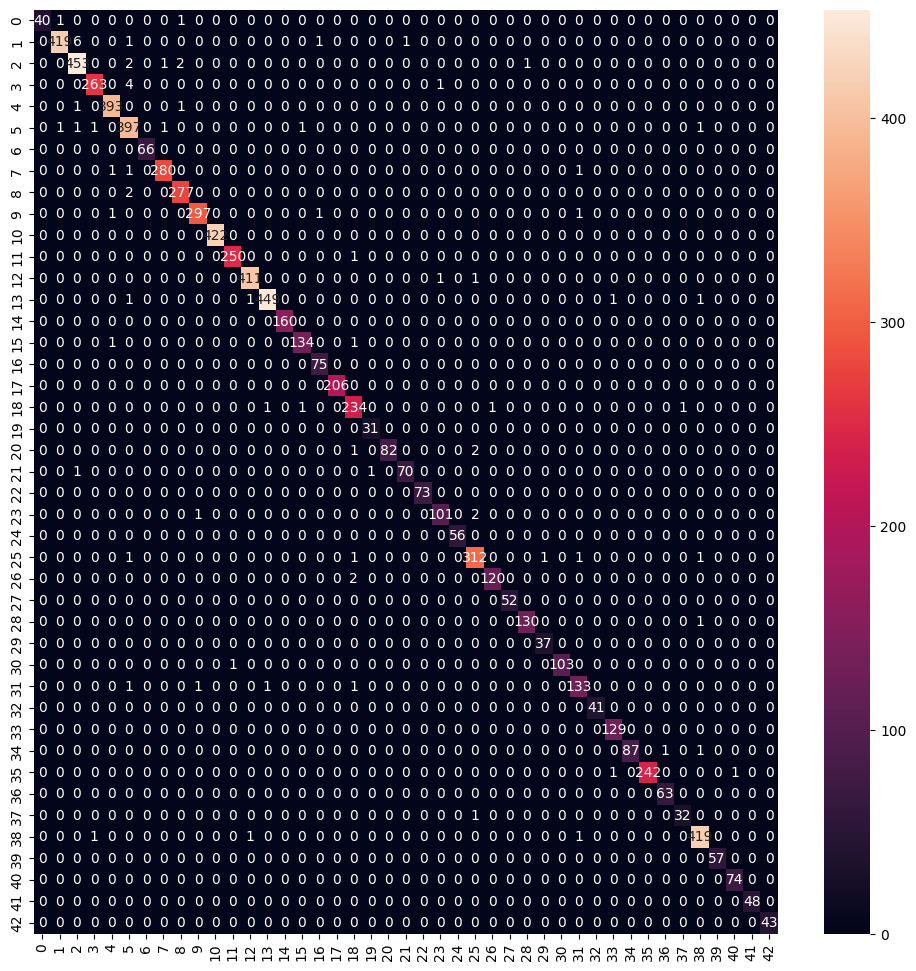

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12, 12))

# predicted_value = model.predict(x_test)

cm = confusion_matrix(np.array(y_test),
                      np.argmax(pred, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [125]:
import pandas as pd

# df=pd.DataFrame(cm)
# df
print(cm)
print('\n')

for i in range(43):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))


[[ 40   1   0 ...   0   0   0]
 [  0 419   6 ...   0   0   0]
 [  0   0 453 ...   0   0   0]
 ...
 [  0   0   0 ...  74   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   0  43]]


label = 0	(40/42)	accuracy = 0.952
label = 1	(419/428)	accuracy = 0.979
label = 2	(453/459)	accuracy = 0.987
label = 3	(263/268)	accuracy = 0.981
label = 4	(393/395)	accuracy = 0.995
label = 5	(397/403)	accuracy = 0.985
label = 6	(66/66)	accuracy = 1.000
label = 7	(280/283)	accuracy = 0.989
label = 8	(277/279)	accuracy = 0.993
label = 9	(297/300)	accuracy = 0.990
label = 10	(422/422)	accuracy = 1.000
label = 11	(250/251)	accuracy = 0.996
label = 12	(411/413)	accuracy = 0.995
label = 13	(449/453)	accuracy = 0.991
label = 14	(160/160)	accuracy = 1.000
label = 15	(134/136)	accuracy = 0.985
label = 16	(75/75)	accuracy = 1.000
label = 17	(206/206)	accuracy = 1.000
label = 18	(234/238)	accuracy = 0.983
label = 19	(31/31)	accuracy = 1.000
label = 20	(82/85)	accuracy = 0.965
label = 21	(70/72)	accuracy 

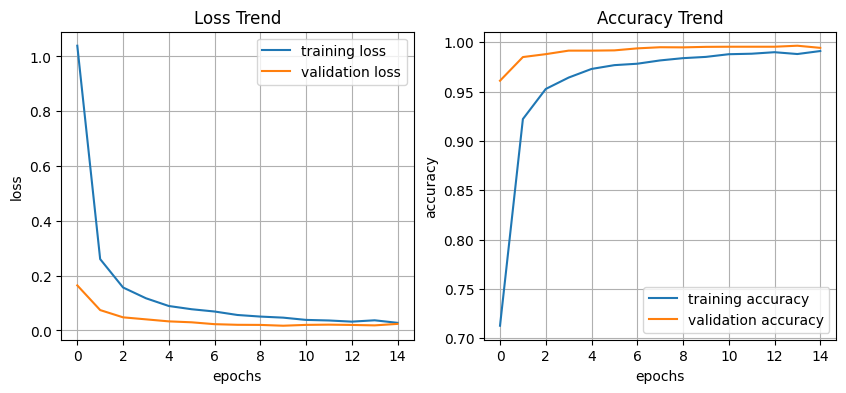

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

# 11. 무작위로 20 개 test 이미지 선택 / 예측 평가

In [135]:
s = np.arange(len(x_test))  # [ 0 1 2...39206 39207 39208]

np.random.shuffle(s)         # index random shuffle
SPLIT_NUMS = 20

x_test = x_test[s]
y_test = y_test[s]

x_sample = x_test[10:SPLIT_NUMS+10]
y_sample = y_test[10:SPLIT_NUMS+10]


In [136]:
pred = model.predict(x_sample)

print(pred.shape)

1/1 [==============================] - 0s 27ms/step
(20, 43)


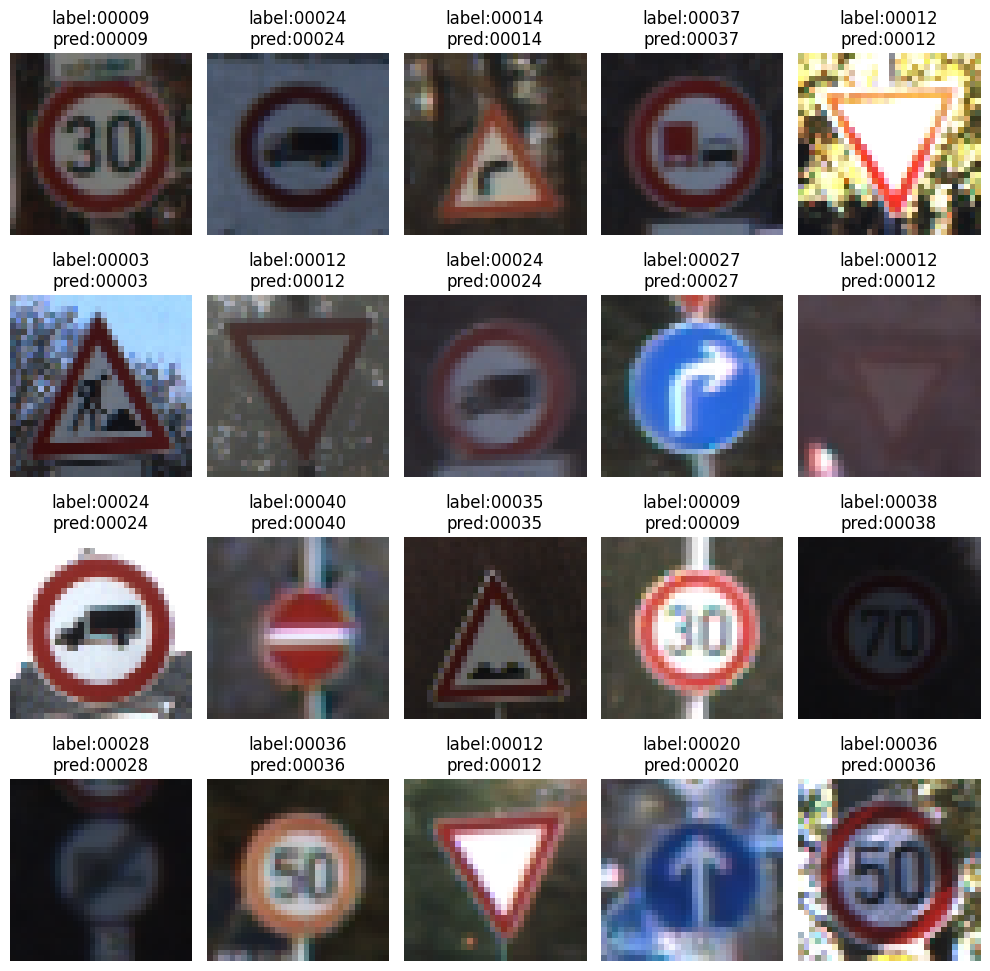

In [137]:

class_names = os.listdir(DATA_ROOT_DIR)
# class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']

plt.figure(figsize=(10,10))

for pos in range(len(pred)):

    plt.subplot(4,5,pos+1)
    plt.axis('off')

    label_str = class_names[int(y_sample[pos])]
    pred_str = class_names[np.argmax(pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(x_sample[pos])

plt.tight_layout()
plt.show()

In [132]:
print(np.unique(y_sample))

[ 1.  2.  3.  4.  7.  8.  9. 10. 11. 13. 17. 18. 25. 31. 34. 38. 39.]


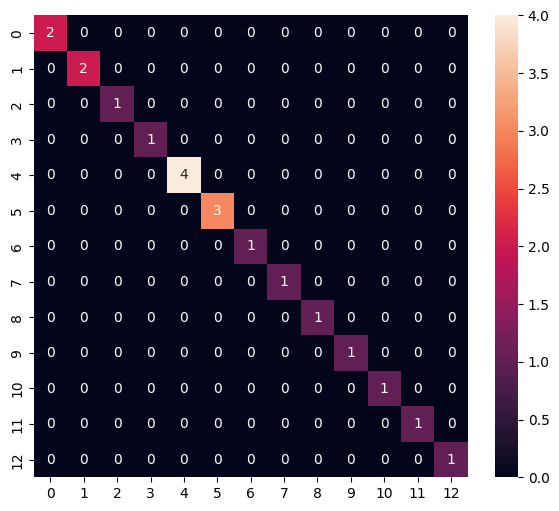

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = os.listdir(DATA_ROOT_DIR)

plt.figure(figsize=(7, 6))

# predicted_value = model.predict(x_test)

cm = confusion_matrix(y_sample,
                      np.argmax(pred, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [139]:
import pandas as pd

df=pd.DataFrame(cm)
df
# print(cm)
print('\n')

for i in range(len(np.unique(y_sample))):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))



label = 0	(2/2)	accuracy = 1.000
label = 1	(2/2)	accuracy = 1.000
label = 2	(1/1)	accuracy = 1.000
label = 3	(1/1)	accuracy = 1.000
label = 4	(4/4)	accuracy = 1.000
label = 5	(3/3)	accuracy = 1.000
label = 6	(1/1)	accuracy = 1.000
label = 7	(1/1)	accuracy = 1.000
label = 8	(1/1)	accuracy = 1.000
label = 9	(1/1)	accuracy = 1.000
label = 10	(1/1)	accuracy = 1.000
label = 11	(1/1)	accuracy = 1.000
label = 12	(1/1)	accuracy = 1.000
